In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.2 Numerische Lösung der Advektionsgleichung

In [3]:
def Anfangsbedigungen(Nx,CFL,verbose=True):
    xmax = 10 
    xmin = 0
    dx = (xmax-xmin)/Nx 
    x = np.linspace(xmin, xmax, Nx) 
    dt = CFL*dx                     # Zeitschrittweite
    t_ende = 5                      # Endzeit
    Nt = int(t_ende/dt)             # Anzahl der Zeitschritte
    
    #Upwind-Verfahren
    c_positiv = 1*(dt/dx)
    c_negativ = 0
    
    #Lax-Friedrich / Lax-Wendroff-Verfahren
    c=dt/dx
    
    # Glatte Anfangsbedingung
    Uo_glatt = np.exp(-2.5*(x-2)**2)
    
    # Initialisierung der Zustandsmatrix
    U_glatt = np.zeros((Nt+1, Nx))
    U_glatt[0] = Uo_glatt
    
    # Unstetige Anfangsbedingung
    Uo_unstetig = np.where(np.logical_and(x>=1, x<=3), 1, 0)
    
    # Initialisierung der Zustandsmatrix
    U_unstetig = np.zeros((Nt+1, Nx))
    U_unstetig[0] = Uo_unstetig
    
    if verbose:
        return U_glatt, U_unstetig, c_positiv, c_negativ, Nt, Nx, x, dt #Upwind-Verfahren
    else:
        return U_glatt, U_unstetig, c, Nt, Nx,x,dt #Lax-Friedrich / Lax-Wendroff-Verfahren / Analytische Lösung (verbose=False)
    
    
    #ja genau, 0.1 bekomme ich als dx
    

In [30]:
def upwind_verfahren(Nx, CFL=1):    
    
    U_glatt, U_unstetig, c_positiv, c_negativ, Nt, Nx, x, dt = Anfangsbedigungen(Nx,CFL)
    
    #Lösung des beschriebenen Problems
    for n in range(Nt):
        for i in range(1, Nx-1):
            U_glatt[n+1, i] = U_glatt[n, i] - c_positiv*(U_glatt[n, i] - U_glatt[n, i-1]) + c_negativ*(U_glatt[n, i+1] - U_glatt[n, i])
            U_unstetig[n+1, i] = U_unstetig[n, i] - c_positiv*(U_unstetig[n, i] - U_unstetig[n, i-1]) + c_negativ*(U_unstetig[n, i+1] - U_unstetig[n, i])
        #Randbedingungen
        U_glatt[n+1, 0] = 0
        U_glatt[n+1, Nx-1] = 0
        U_unstetig[n+1, 0] = 0
        U_unstetig[n+1, Nx-1] = 0
            
    return U_glatt, U_unstetig, x, dt
# Frage: Es ist noch nicht ganz klar mit den Randbedingungen

Analytische Lösung 

In [5]:
#Analytische Lösung
def analytisch(Nx, CFL=1):    
    U_glatt, U_unstetig, c, Nt, Nx, x, dt = Anfangsbedigungen(Nx,CFL,verbose = False)
    t = np.linspace(0, 5, Nt)     
    #Lösung des beschriebenen Problems
    for n in range(Nt):
        for i in range(0, Nx-1):
            U_glatt[n+1, i+1] = np.exp(-2.5*(x[i]-t[n]-2)**2)
            U_unstetig[n+1, i+1] = np.logical_and(x[i]-t[n]>=1, x[i]-t[n]<=3)
        #Randbedingungen
        U_glatt[n+1, 0] = 0
        U_glatt[n+1, -1] = 0
        U_unstetig[n+1, 0] = 0
        U_unstetig[n+1, -1] = 0        
    return U_glatt, U_unstetig, x, dt

i) Löse das beschriebene Problem mithilfe des Upwind-Verfahrens für die glatte und unstetige Anfangsbedingung

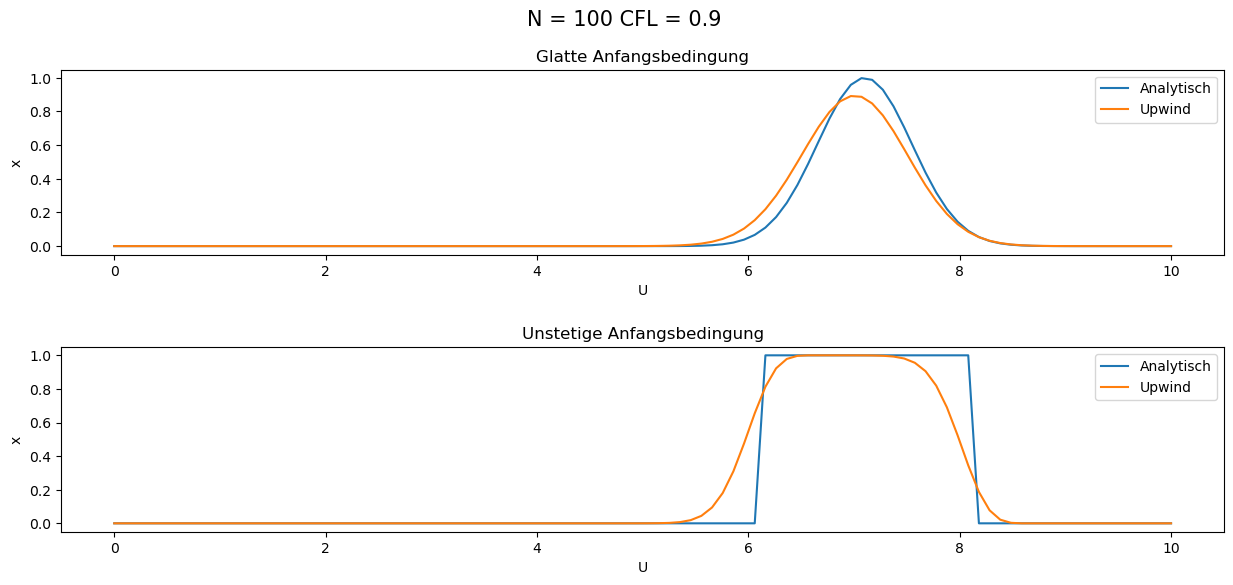

In [61]:
N = 100
CFL = 0.9

fig, axs = plt.subplots(2, 1,figsize=(15, 6))
fig.suptitle(f'N = {N} CFL = {CFL}', fontsize=15)
fig.subplots_adjust(hspace=0.5)

U_glatt_analytisch, U_unstetig_analytisch, x_analytisch, dt_analytisch = analytisch(N, CFL)
U_glatt_upwind, U_unstetig_upwind, x_upwind, dt_upwind = upwind_verfahren(N, CFL)

axs[0].plot(x_analytisch, U_glatt_analytisch[-1], label='Analytisch')
axs[0].plot(x_upwind, U_glatt_upwind[-1], label='Upwind')
axs[0].set_title(f'Glatte Anfangsbedingung')
axs[0].set_xlabel('U')
axs[0].set_ylabel('x')
axs[0].legend()


axs[1].plot(x_analytisch, U_unstetig_analytisch[-1], label='Analytisch')
axs[1].plot(x_upwind, U_unstetig_upwind[-1], label='Upwind')
axs[1].set_title(f'Unstetige Anfangsbedingung')
axs[1].set_xlabel('U')
axs[1].set_ylabel('x')
axs[1].legend()


ii) Führe die Berechnung für verschiedene Netzauflösungen N = 20, N = 50 ,N = 100, N = 200 und verschiedene CFL-Zahlen ≤ 1 durch und vergleiche die so berechneten numerischen Lösungen mit der analytischen Lösung.

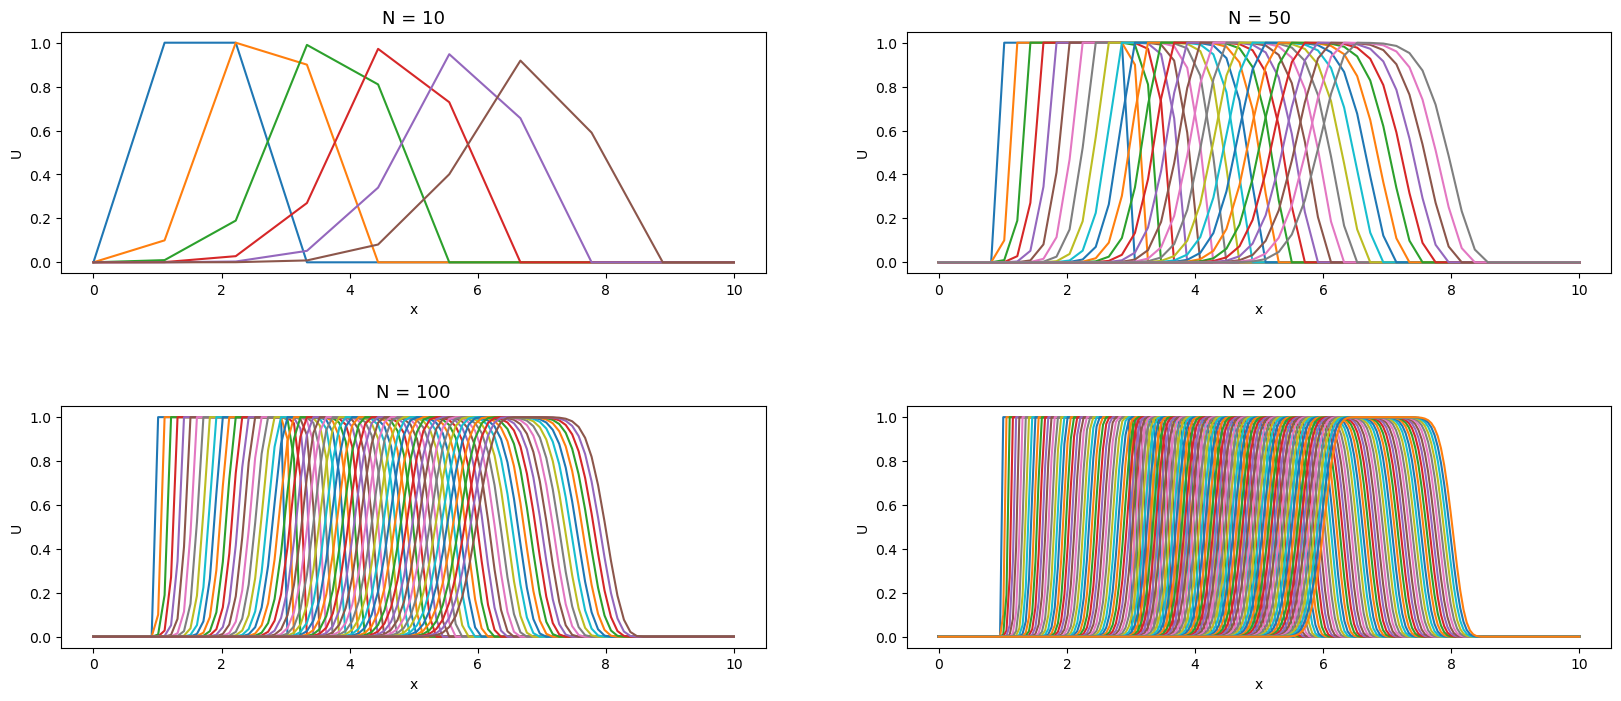

In [38]:
N = [10, 50, 100, 200]
CFL = 0.9

# Plot der Lösung mit subplot
f2 = plt.figure(figsize=(20, 8))
# plt.suptitle(f'Upwind-Verfahren mit glatter Anfangsbedingung mit CFL {CFL}', fontsize=15)
for k in range(len(N)):
    U_glatt, U_unstetig, x_ii,dt = upwind_verfahren(N[k], CFL)
    
    ax = f2.add_subplot(2, 2, k+1)
    for n in range(U_glatt.shape[0]):
        # ax.plot(x_ii, U_glatt[n], label='t='+str(k*dt))
        ax.plot(x_ii, U_unstetig[n], label='t='+str(k*dt))
    ax.set_xlabel('x')
    ax.set_ylabel('U')
    #font size of the title = 15
    ax.title.set_fontsize(13)
    ax.title.set_text('N = '+str(N[k]))
plt.subplots_adjust(hspace=0.55)
plt.show()

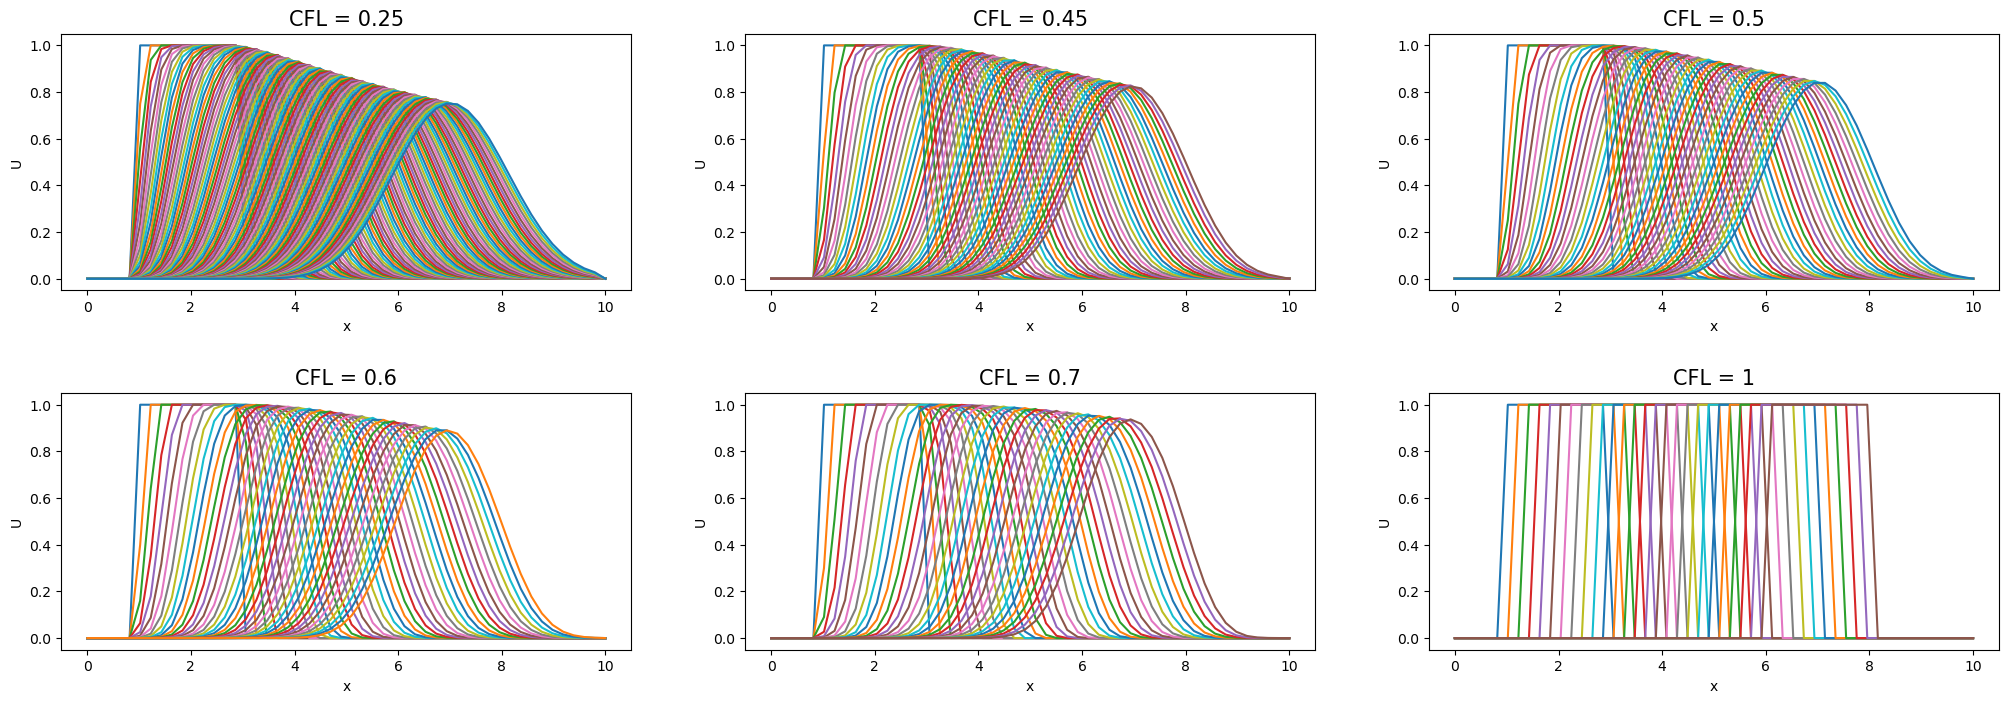

In [65]:
CFL = [0.25, 0.45, 0.5, 0.6, 0.7, 1]
N = 50

# Plot der Lösung mit subplot
f3 = plt.figure(figsize=(25, 8))
# plt.suptitle(f'Upwind-Verfahren mit glatter Anfangsbedingung mit N = {N}', fontsize=15)
for k in range(len(CFL)):
    U_glatt, U_unstetig, x_ii,dt = upwind_verfahren(N, CFL[k])
    
    #Subplots
    ax = f3.add_subplot(2, 3, k+1)
    for n in range(U_glatt.shape[0]):
        # ax.plot(x_ii, U_glatt[n], label='t='+str(k*dt))
        ax.plot(x_ii, U_unstetig[n], label='t='+str(k*dt))
    ax.set_xlabel('x')
    ax.set_ylabel('U')
    ax.title.set_fontsize(15)
    ax.title.set_text('CFL = '+str(CFL[k]))
plt.subplots_adjust(hspace=0.4)
plt.show()


iii) Führe die Berechnungen aus i) mit dem Lax-Friedrich und dem Lax-Wendroff Verfahren durch und vergleiche die Lösungen mit denen des Upwindverfahrens

In [8]:
def lax_friedrich(Nx, CFL):
    U_glatt, U_unstetig, c, Nt, Nx, x, dt = Anfangsbedigungen(Nx,CFL,verbose = False)
    #Lösung des beschriebenen Problems
    for n in range(Nt):
        for i in range(1, Nx-1):
            U_glatt[n+1, i] = 0.5*(U_glatt[n, i+1] + U_glatt[n, i-1]) - 0.5*c*(U_glatt[n, i+1] - U_glatt[n, i-1])
            U_unstetig[n+1, i] = 0.5*(U_unstetig[n, i+1] + U_unstetig[n, i-1]) - 0.5*c*(U_unstetig[n, i+1] - U_unstetig[n, i-1])
        #Randbedingungen
        U_glatt[n+1, 0] = 0
        U_glatt[n+1, Nx-1] = 0
        U_unstetig[n+1, 0] = 0
        U_unstetig[n+1, Nx-1] = 0
            
    return U_glatt, U_unstetig, x, dt

def lax_wendroff(Nx, CFL):
    U_glatt, U_unstetig, c, Nt, Nx, x, dt = Anfangsbedigungen(Nx,CFL,verbose = False)
    #Lösung des beschriebenen Problems
    for n in range(Nt):
        for i in range(1, Nx-1):
            U_glatt[n+1, i] = U_glatt[n, i] - 0.5*c*(U_glatt[n, i+1] - U_glatt[n, i-1]) + 0.5*c**2*(U_glatt[n, i+1] - 2*U_glatt[n, i] + U_glatt[n, i-1])
            U_unstetig[n+1, i] = U_unstetig[n, i] - 0.5*c*(U_unstetig[n, i+1] - U_unstetig[n, i-1]) + 0.5*c**2*(U_unstetig[n, i+1] - 2*U_unstetig[n, i] + U_unstetig[n, i-1])
        #Randbedingungen
        U_glatt[n+1, 0] = 0
        U_glatt[n+1, Nx-1] = 0
        U_unstetig[n+1, 0] = 0
        U_unstetig[n+1, Nx-1] = 0
    
    return U_glatt, U_unstetig, x, dt

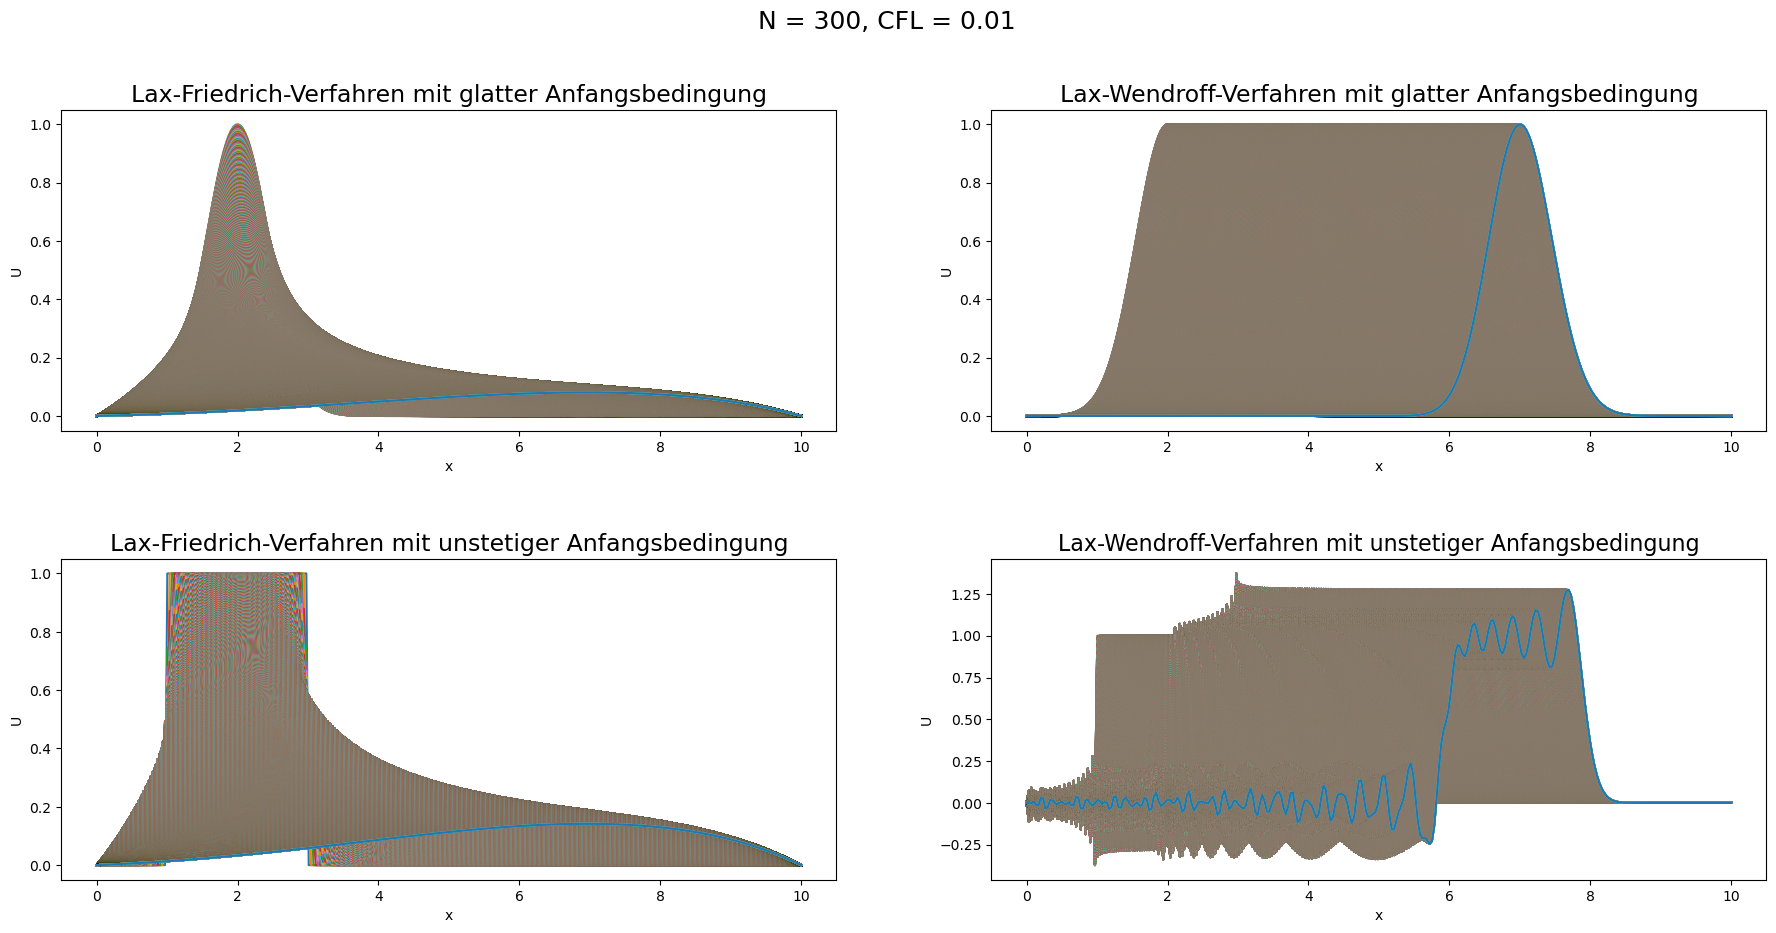

In [35]:
#Plot der Lösung

Nx=300
CFL=0.01

U_glatt_fried, U_unstetig_fried, x_fried, dt_fried = lax_friedrich(Nx, CFL)
U_glatt_wendroff, U_unstetig_wendroff, x_wendroff, dt_wendroff = lax_wendroff(Nx, CFL)

f4 = plt.figure(figsize=(22, 10))
plt.suptitle(f'N = {Nx}, CFL = {CFL}', fontsize=18)
ax = f4.add_subplot(221)
plt.title(f'Lax-Friedrich-Verfahren mit glatter Anfangsbedingung', fontsize=17)
for n in range(U_glatt_fried.shape[0]):
    plt.plot(x_fried, U_glatt_fried[n], label='t='+str(n*dt_fried))
    # plt.plot(x, U_unstetig[n], label='t='+str(n*dt))
ax.set_xlabel('x')
ax.set_ylabel('U')

ax = f4.add_subplot(222)
plt.title(f'Lax-Wendroff-Verfahren mit glatter Anfangsbedingung', fontsize=17)
for n in range(U_glatt_wendroff.shape[0]):
    plt.plot(x_wendroff, U_glatt_wendroff[n], label='t='+str(n*dt_wendroff))
    # plt.plot(x, U_unstetig[n], label='t='+str(n*dt))
ax.set_xlabel('x')
ax.set_ylabel('U')
    
ax = f4.add_subplot(223)
plt.title(f'Lax-Friedrich-Verfahren mit unstetiger Anfangsbedingung', fontsize=17)
for n in range(U_unstetig_fried.shape[0]):
    plt.plot(x_fried, U_unstetig_fried[n], label='t='+str(n*dt_fried))
ax.set_xlabel('x')
ax.set_ylabel('U')

ax = f4.add_subplot(224)
plt.title(f'Lax-Wendroff-Verfahren mit unstetiger Anfangsbedingung', fontsize=17)
for n in range(U_unstetig_wendroff.shape[0]):
    plt.plot(x_wendroff, U_unstetig_wendroff[n], label='t='+str(n*dt_wendroff))
ax.set_xlabel('x')
ax.set_ylabel('U')
    
ax.title.set_fontsize(16)
plt.subplots_adjust(hspace=0.4)
plt.show()

#Schlussfolgerung: Lax-Wendroff-Verfahren ist besser als Lax-Friedrich-Verfahren, bleibt es immer stabiler für großes N, 
#obwohl CFL kleiner ist? Man versuchte mit Extremwerten; CFL=0.01 und N=300 , aber es ist immer noch stabil.

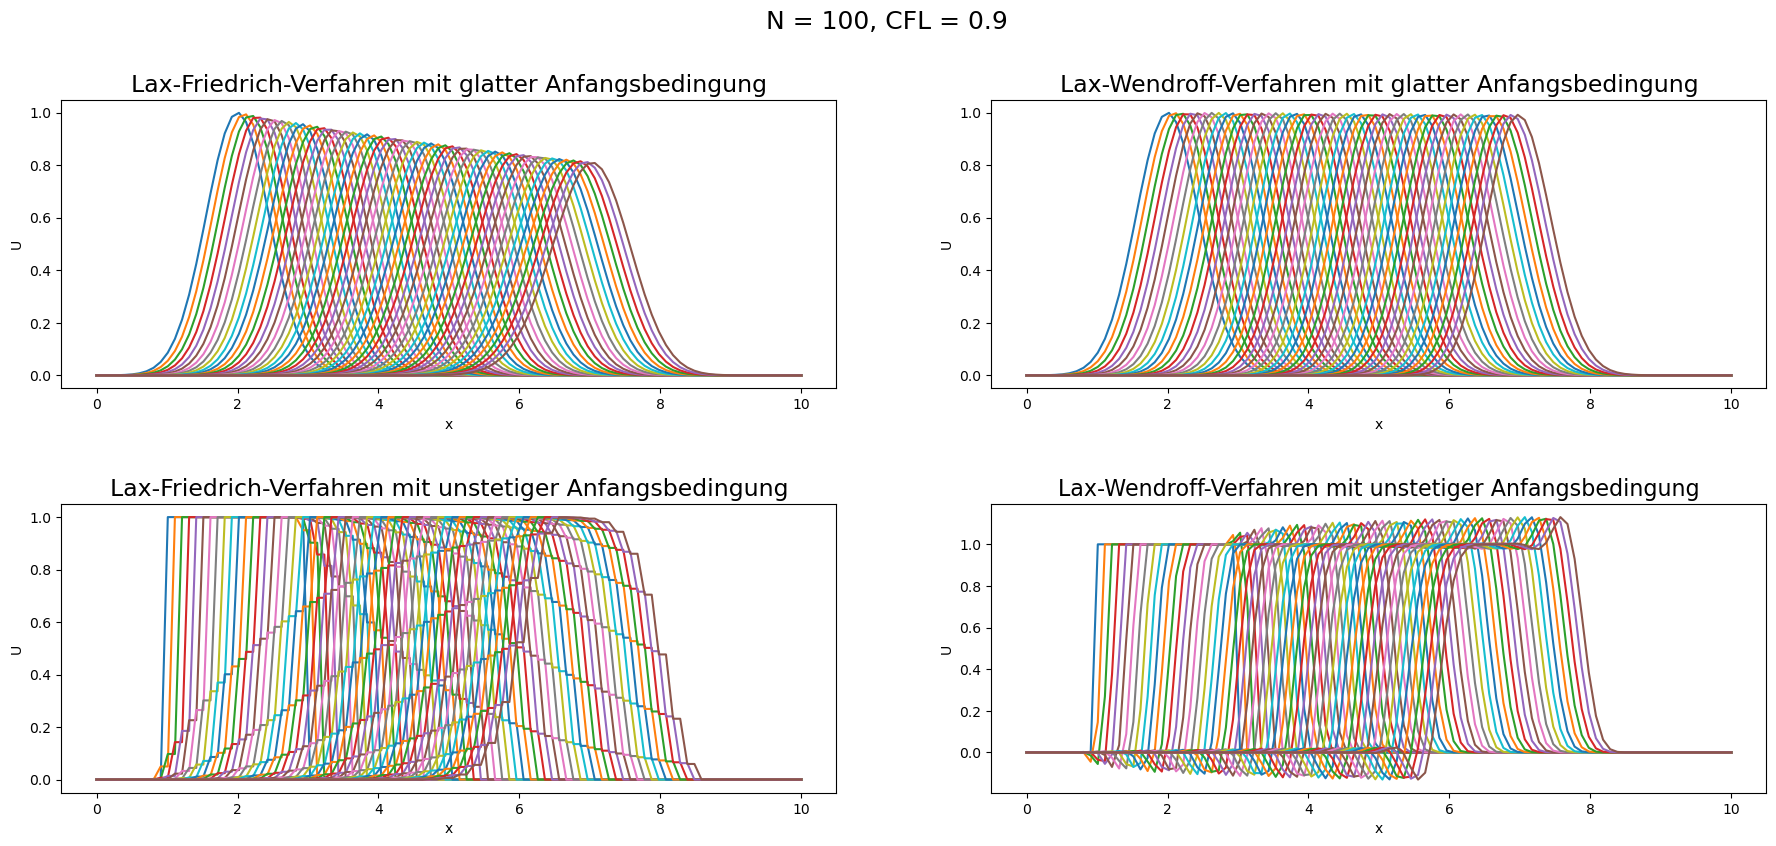

In [36]:
#Plot der Lösung

Nx=100
CFL=0.9

U_glatt_fried, U_unstetig_fried, x_fried, dt_fried = lax_friedrich(Nx, CFL)
U_glatt_wendroff, U_unstetig_wendroff, x_wendroff, dt_wendroff = lax_wendroff(Nx, CFL)

f4 = plt.figure(figsize=(22, 9))
plt.suptitle(f'N = {Nx}, CFL = {CFL}', fontsize=18)
ax = f4.add_subplot(221)
plt.title(f'Lax-Friedrich-Verfahren mit glatter Anfangsbedingung', fontsize=17)
for n in range(U_glatt_fried.shape[0]):
    plt.plot(x_fried, U_glatt_fried[n], label='t='+str(n*dt_fried))
    # plt.plot(x, U_unstetig[n], label='t='+str(n*dt))
ax.set_xlabel('x')
ax.set_ylabel('U')

ax = f4.add_subplot(222)
plt.title(f'Lax-Wendroff-Verfahren mit glatter Anfangsbedingung', fontsize=17)
for n in range(U_glatt_wendroff.shape[0]):
    plt.plot(x_wendroff, U_glatt_wendroff[n], label='t='+str(n*dt_wendroff))
    # plt.plot(x, U_unstetig[n], label='t='+str(n*dt))
ax.set_xlabel('x')
ax.set_ylabel('U')
    
ax = f4.add_subplot(223)
plt.title(f'Lax-Friedrich-Verfahren mit unstetiger Anfangsbedingung', fontsize=17)
for n in range(U_unstetig_fried.shape[0]):
    plt.plot(x_fried, U_unstetig_fried[n], label='t='+str(n*dt_fried))
ax.set_xlabel('x')
ax.set_ylabel('U')

ax = f4.add_subplot(224)
plt.title(f'Lax-Wendroff-Verfahren mit unstetiger Anfangsbedingung', fontsize=17)
for n in range(U_unstetig_wendroff.shape[0]):
    plt.plot(x_wendroff, U_unstetig_wendroff[n], label='t='+str(n*dt_wendroff))
ax.set_xlabel('x')
ax.set_ylabel('U')
    
ax.title.set_fontsize(16)
plt.subplots_adjust(hspace=0.4)
plt.show()


#Schlussfolgerung: Lax-Wendroff-Verfahren ist besser als Lax-Friedrich-Verfahren, bleibt es immer stabiler für großes N, 
#obwohl CFL kleiner ist? Man versuchte mit Extremwerten; CFL=0.01 und N=300 , aber es ist immer noch stabil.

1.3 Das FTCS Verfahren für die Advektionsgleichung

In [70]:
def FTCS(Nx, CFL):
    U_glatt, U_unstetig, c, Nt, Nx, x, dt = Anfangsbedigungen(Nx,CFL,verbose = False)
    #Lösung des beschriebenen Problems
    for n in range(Nt):
        for i in range(1, Nx-1):
            U_glatt[n+1, i] = U_glatt[n, i] - 0.5*c*(U_glatt[n, i+1] - U_glatt[n, i-1])
            U_unstetig[n+1, i] = U_unstetig[n, i] - 0.5*c*(U_unstetig[n, i+1] - U_unstetig[n, i-1])
        #Randbedingungen
        U_glatt[n+1, 0] = 0
        U_glatt[n+1, Nx-1] = 0
        U_unstetig[n+1, 0] = 0
        U_unstetig[n+1, Nx-1] = 0
    
    return U_glatt, U_unstetig, x, dt


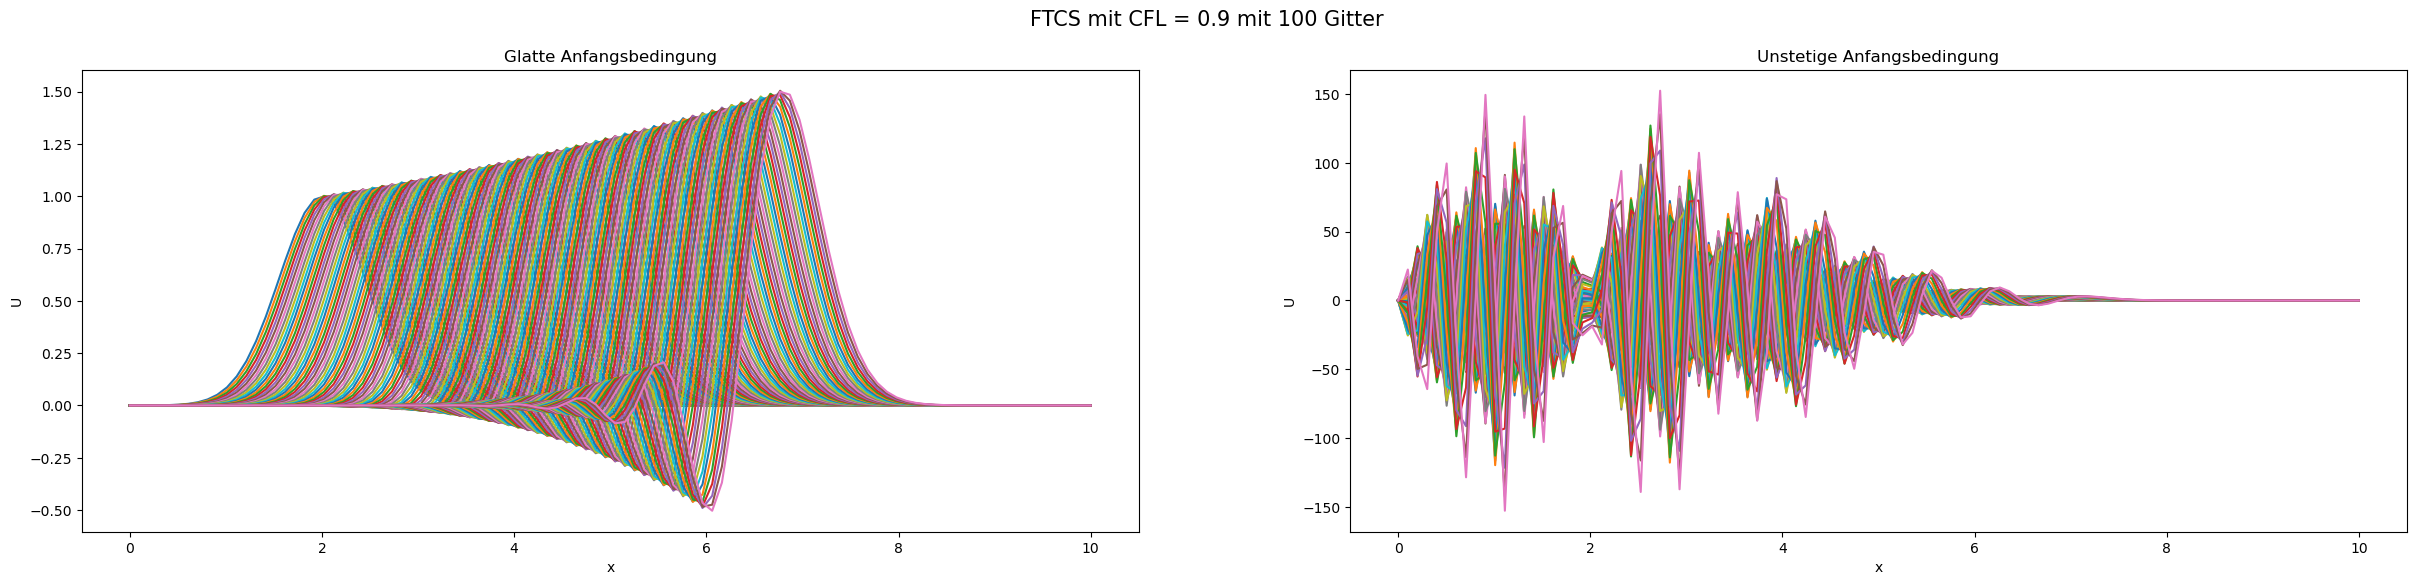

In [74]:
#Plot der Lösung

N=100
CFL=0.3

# Plot der Lösung    
f5 = plt.figure(figsize=(30, 6))
plt.suptitle('FTCS mit CFL = 0.9 mit 100 Gitter', fontsize=15)

U_glatt, U_unstetig, x, dt = FTCS(N, CFL)

ax1 = plt.subplot(121)
for n in range(U_glatt.shape[0]):
    plt.plot(x, U_glatt[n], label='t='+str(n*dt))
plt.title('Glatte Anfangsbedingung')
plt.xlabel('x')
plt.ylabel('U')

ax2 = plt.subplot(122)
for n in range(U_unstetig.shape[0]):
    plt.plot(x, U_unstetig[n], label='t='+str(n*dt))
plt.title('Unstetige Anfangsbedingung')
plt.xlabel('x')
plt.ylabel('U')

plt.show()

1.4 Implizite Zeitschrittverfahren

<Figure size 3000x600 with 0 Axes>

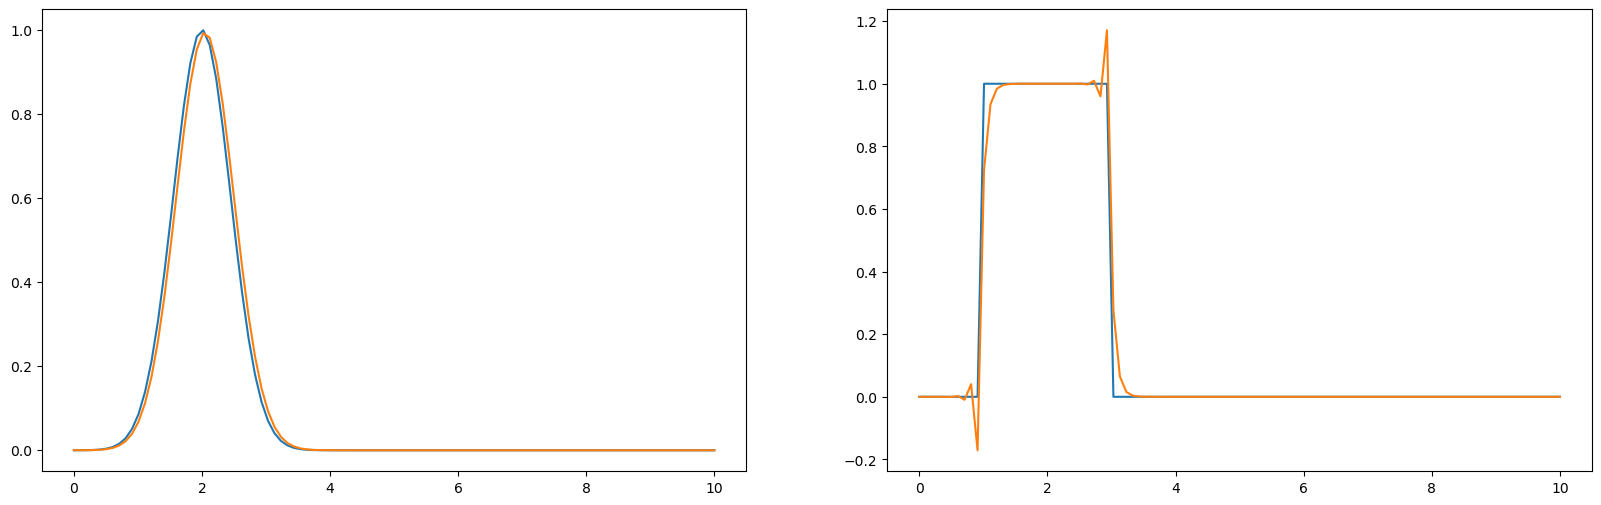

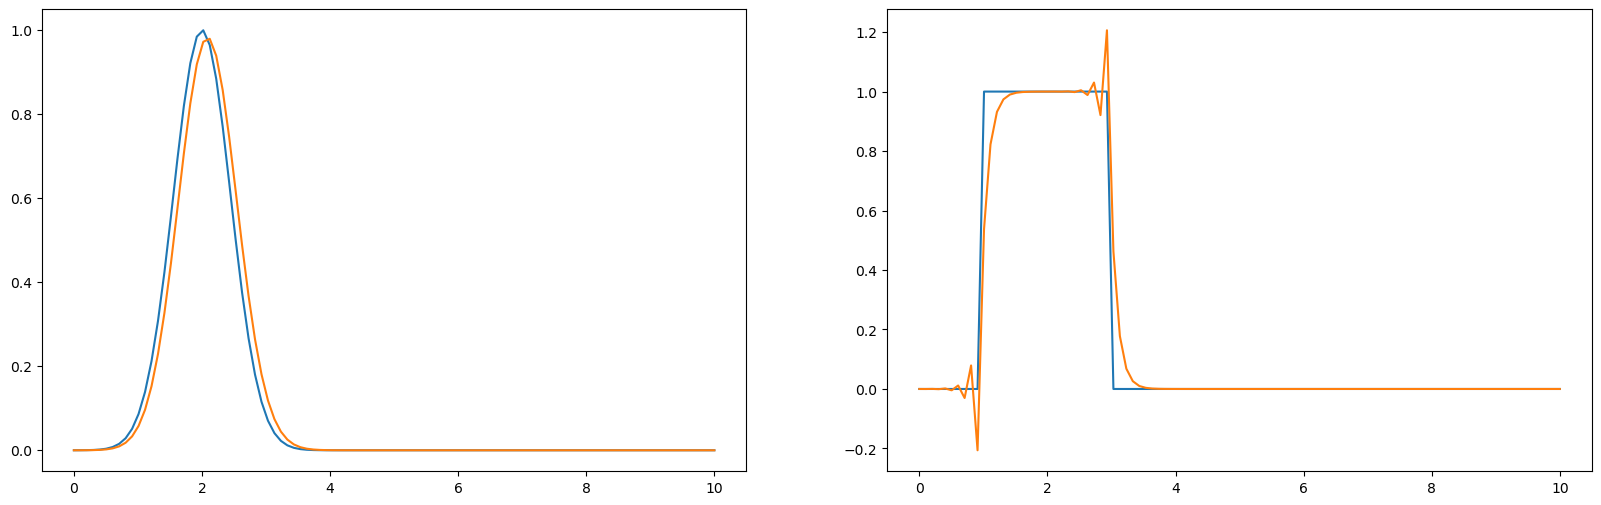

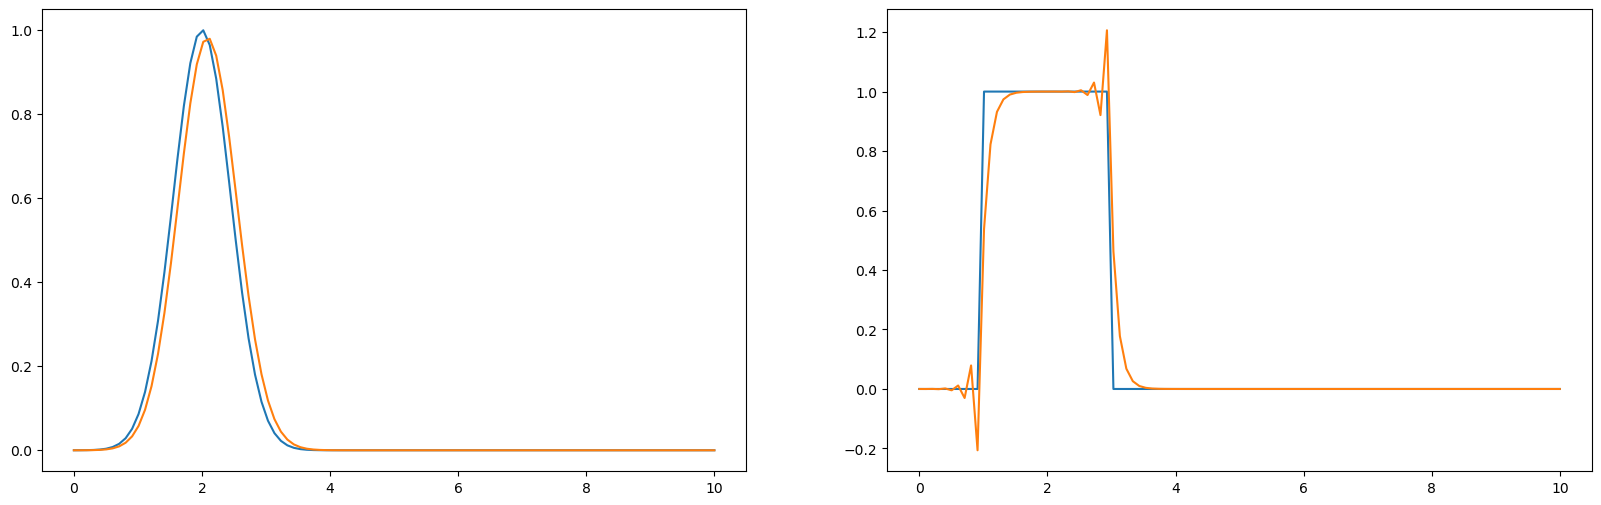

In [73]:
xmax = 10
xmin = 0
Nx = 100
dx = (xmax-xmin)/Nx
x = np.linspace(xmin, xmax, Nx)

clf = [.5, .9]

f6 = plt.figure(figsize=(30, 6))
plt.suptitle('FTCS mit CFL = 0.9 mit 100 Gitter', fontsize=15)

for l in clf:
    dt = l * dx

    c = dt/dx
    D = np.diag(np.ones(Nx-1) * -1, 1) + np.diag(np.ones(Nx-1), -1)
    matFactor = np.eye(Nx) - c/2 * D

    # Glatte Anfangsbedingung
    U_glatt = np.zeros((2, Nx))
    U_glatt[0] = np.exp(-5/2*(x-2)**2)

    U_glatt[1] = np.linalg.solve(matFactor, U_glatt[0])

    U_glatt[1, 0] = 0
    U_glatt[1, Nx-1] = 0

    # Unstetige Anfangsbedingung
    U_unstetig = np.zeros((2, Nx))
    U_unstetig[0] = np.where(np.logical_and(x>=1, x<=3), 1, 0)

    U_unstetig[1] = np.linalg.solve(matFactor, U_unstetig[0])

    U_unstetig[1, 0] = 0;
    U_unstetig[1, Nx-1] = 0;

    fig = plt.figure(figsize=(20,6))

    ax1 = plt.subplot(121)
    for n in range(U_glatt.shape[0]):
        plt.plot(x, U_glatt[n])

    ax2 = plt.subplot(122)
    for n in range(U_unstetig.shape[0]):
        plt.plot(x, U_unstetig[n])

    plt.show()